#### Será realizada a análise de uma base de dados disponibilizada pela Bix no arquivo excel 'Bix.xls'. O arquivo faz referência a uma loja fictícia, com produtos, clientes e vendas.

Primeiramente, importamos as bibliotecas necessárias:

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, date


É importada a planilha 'Bix' e são gerados dataframes com base em cada aba da planilha:

In [7]:
xls=pd.ExcelFile('Bix.xlsx')
df_bruto=pd.read_excel(xls,'BaseBruta',skiprows=3)
df=pd.read_excel(xls,'Vendas',skiprows=5)

São dropadas então as colunas desnecessárias:

In [8]:
df_bruto.drop('Unnamed: 0',axis=1,inplace=True)
df_bruto.drop('VlUnitario',axis=1,inplace=True)
df_bruto.drop('Desconto',axis=1,inplace=True)
df.drop('Unnamed: 0',axis=1,inplace=True)

É criado um dataset completo com o merge dos dois datasets criados anteriormente:

In [9]:
full_df=pd.merge(df_bruto,df,how='outer',on=['ID','ProdutoID','Produto','Tamanho','ClienteID','LojaID','Loja','UF','Data','Qtd'])
full_df.head(5)

,ID,ProdutoID,Produto,Tamanho,ClienteID,ClienteCidade,ClienteUF,DataNascimentoCliente,SexoCliente,LojaID,...,Data,Qtd,Desconto,VlUnitario,Venda Bruta,Valor do Desconto,Venda Líquida,DataNascimento_Cliente,Idade,Classificação Etária
0,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,Tempestade,G,14001,Curitiba,PR,1985-06-28,Homem,4,...,2018-12-10,1,0.08,249.2,NaN,NaN,NaN,NaN,NaN,NaN
1,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,Thanos,G,14001,Curitiba,PR,1985-06-28,Homem,4,...,2019-04-25,1,0.10,162.4,NaN,NaN,NaN,NaN,NaN,NaN
2,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,Capitão América,P,14001,Curitiba,PR,1985-06-28,Homem,4,...,2019-07-17,1,0.10,194.6,NaN,NaN,NaN,NaN,NaN,NaN
3,7180475b60fe6bbbde424d39704a1177,001b72dfd63e9833e8c02742adf472e33,Wolverine,G,14002,Florianópolis,SC,1987-01-10,Homem,1,...,2018-04-10,2,0.10,201.6,NaN,NaN,NaN,NaN,NaN,NaN
4,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,Naruto,G,14002,Florianópolis,SC,1987-01-10,Homem,1,...,2019-01-21,1,0.10,406.0,NaN,NaN,NaN,NaN,NaN,NaN


Percebe-se que há colunas não preenchidas no dataset. Para o preenchimento das colunas de idade e faixa de idade são criadas as duas funções abaixo:

In [39]:
def faixa(idade):
    if (idade>=0 and idade<11):
        return 'Infantil'
    elif (idade>=11 and idade<21):
        return 'Adolescente'
    elif (idade>=21 and idade<61):
        return 'Adulto'
    elif (idade>=61):
        return 'Idoso'

In [11]:
def id(nasc,hoje):
    return (hoje-nasc).days//365

Todas as colunas vazias são então preenchidas:

In [40]:
full_df['Venda Bruta']=full_df['Qtd']*full_df['VlUnitario']
full_df['Valor do Desconto']=full_df['Desconto']*full_df['VlUnitario']
full_df['Venda Líquida']=full_df['Venda Bruta']-full_df['Valor do Desconto']
full_df['DataNascimento_Cliente']=full_df['DataNascimentoCliente']
full_df['Idade'] = full_df.apply(lambda x: id(x.DataNascimentoCliente, x.Data), axis=1)
full_df['Classificação Etária']=full_df['Idade'].apply(faixa)


In [41]:
full_df.head(5)

,ID,ProdutoID,Produto,Tamanho,ClienteID,ClienteCidade,ClienteUF,DataNascimentoCliente,SexoCliente,LojaID,...,Data,Qtd,Desconto,VlUnitario,Venda Bruta,Valor do Desconto,Venda Líquida,DataNascimento_Cliente,Idade,Classificação Etária
0,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,Tempestade,G,14001,Curitiba,PR,1985-06-28,Homem,4,...,2018-12-10,1,0.08,249.2,249.2,19.936,229.264,1985-06-28,33,Adulto
1,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,Thanos,G,14001,Curitiba,PR,1985-06-28,Homem,4,...,2019-04-25,1,0.10,162.4,162.4,16.240,146.160,1985-06-28,33,Adulto
2,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,Capitão América,P,14001,Curitiba,PR,1985-06-28,Homem,4,...,2019-07-17,1,0.10,194.6,194.6,19.460,175.140,1985-06-28,34,Adulto
3,7180475b60fe6bbbde424d39704a1177,001b72dfd63e9833e8c02742adf472e33,Wolverine,G,14002,Florianópolis,SC,1987-01-10,Homem,1,...,2018-04-10,2,0.10,201.6,403.2,20.160,383.040,1987-01-10,31,Adulto
4,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,Naruto,G,14002,Florianópolis,SC,1987-01-10,Homem,1,...,2019-01-21,1,0.10,406.0,406.0,40.600,365.400,1987-01-10,32,Adulto


## ANÁLISES

Com todos os dados preenchidos, são verificados primeiramente os valores básicos da base:

    Primeiramente, o valor total das vendas brutas da loja:

In [14]:
full_df['Venda Bruta'].sum()

7688893.800000001

    É possível verificar também o valor total dos descontos dados ao longo do período:

In [15]:
full_df['Valor do Desconto'].sum()

675315.1440000001

    Com o valor das vendas brutas e o total de descontos concedidos, é possível verificar então o valor líquido de vendas de nossa loja:

In [16]:
full_df['Venda Líquida'].sum()

7013578.6559999995

    Verificado os valores absolutos de vendas, faremos análises mais específicas. Por exemplo, é possível verificar o valor das vendas de uma loja específica ('Online', por exemplo), e verificar a participação de cada loja nas vendas com um gráfico de pizza:

In [17]:
full_df[full_df['Loja']=='Online'][['Venda Líquida']].sum()

Venda Líquida    198551.108
dtype: float64

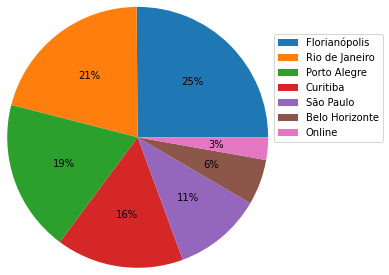

In [30]:
plt.pie(full_df['Loja'].value_counts(), data=df, autopct='%1.0f%%',radius=1.5)
plt.legend(labels=['Florianópolis', 'Rio de Janeiro', 'Porto Alegre','Curitiba','São Paulo','Belo Horizonte','Online'], bbox_to_anchor=(1.65, 1))

    É possível também verificar qual o total líquido de vendas para cada produto. A visualização pode ser feita com um gráfico de barras:

In [102]:
full_df.groupby(['Produto'])['Venda Líquida'].sum().sort_values()

Produto
Thor                   149460.192
Coringa                150741.584
Dragon Ball Z          180380.928
Darth Vader            192311.560
Mulher-Maravilha       196701.232
Pokemon Go Squirtle    204467.200
Homer Simpsons         215173.280
Thanos                 215758.144
Rick Morty             249222.176
Capitão América        250162.192
Pantera Negra          259805.952
Wolverine              266950.656
Flash                  270184.096
Iron Man               287519.400
Super Mario            287889.084
Bazinga                290620.512
Capitã Marvel          305064.144
Batman                 306801.712
Tempestade             315093.464
League Legends         316242.556
Deadpool               345335.536
Ciclope                350424.536
Naruto                 515660.600
BIXDream               891607.920
Name: Venda Líquida, dtype: float64

<BarContainer object of 24 artists>

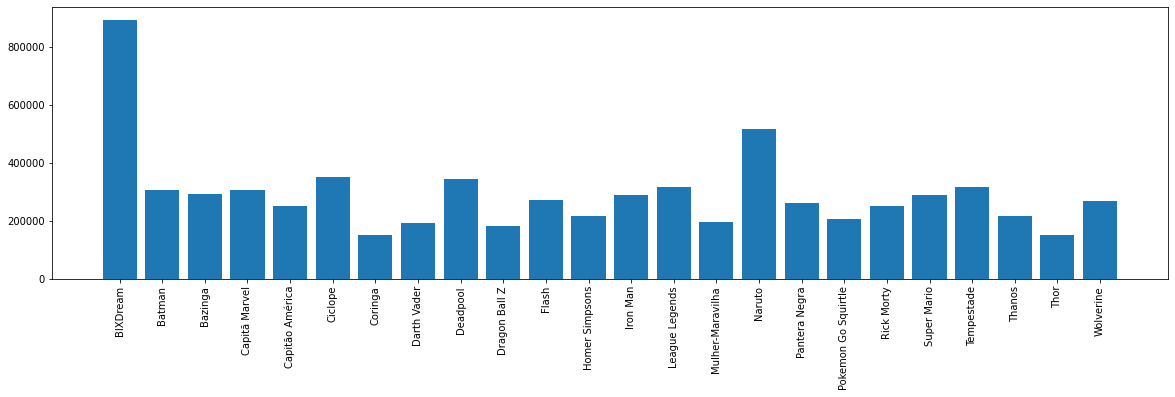

In [37]:
plt.rcParams["figure.figsize"] = (20, 5)
plt.xticks(rotation='vertical')
plt.bar(full_df.groupby(['Produto'])['Venda Líquida'].sum().index,full_df.groupby(['Produto'])['Venda Líquida'].sum())

    Em seguida, verificaremos a participação em porcentagem de cada faixa etária dos clientes no valor líquido das vendas:

In [43]:
((full_df.groupby(['Classificação Etária'])[['Venda Líquida']].sum()/full_df['Venda Líquida'].sum())*100).sort_values('Venda Líquida', ascending=False)

,Venda Líquida
Classificação Etária,
Adulto,89.519254
Idoso,7.559294
Adolescente,2.921452


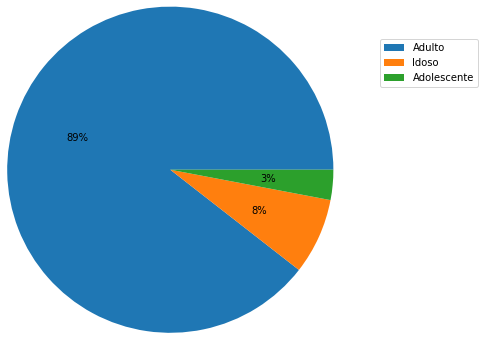

In [44]:
plt.pie(full_df['Classificação Etária'].value_counts(), data=df, autopct='%1.0f%%',radius=1.5)
plt.legend(labels=['Adulto', 'Idoso', 'Adolescente'], bbox_to_anchor=(1.65, 1))

    Para análises mais complexas, é possível verificar por exemplo a distribuição dos valores de vendas líquidas para cada tamanho de produto por cada faixa etária, com visualização em um gráfico de barras:

In [57]:
full_df.groupby(['Classificação Etária','Tamanho'])[['Venda Líquida']].sum().sort_values(['Classificação Etária','Venda Líquida'])

Venda Líquida
Classificação Etária Tamanho               
Adolescente          GG            1310.540
                     M            28914.368
                     P            33514.040
                     G           141159.368
Adulto               GG           57921.360
                     M           999817.392
                     P          1061746.924
                     G          4159017.632
Idoso                GG            4243.960
                     M            93077.880
                     P            93414.440
                     G           339440.752

<AxesSubplot:ylabel='Classificação Etária'>

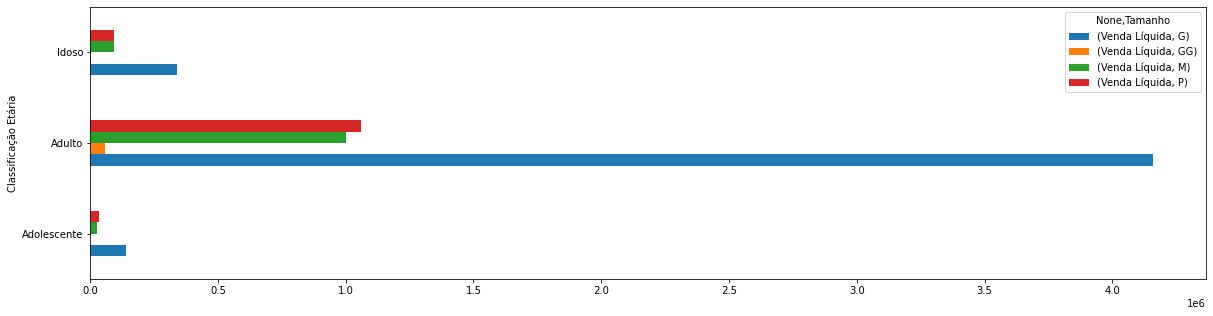

In [60]:
(full_df.groupby(['Classificação Etária','Tamanho'])[['Venda Líquida']].sum().sort_values(['Venda Líquida'])).unstack().plot(kind='barh')

    Podemos também separar os valores de vendas líquidas para cada produto por faixa etária:

In [115]:
full_df.groupby(['Classificação Etária','Produto'])[['Venda Líquida']].sum()

Venda Líquida
Classificação Etária Produto                       
Adulto               BIXDream            807106.440
                     Batman              272334.916
                     Bazinga             262691.520
                     Capitã Marvel       268426.872
                     Capitão América     222637.968
...                                             ...
Jovem                Super Mario          10521.504
                     Tempestade            8442.896
                     Thanos                6547.968
                     Thor                  3984.288
                     Wolverine             8640.576

[72 rows x 1 columns]

    Abaixo, é verificado o valor total para o mês de janeiro de 2020. O mesmo procedimento pode ser aplicado para verificar as vendas de cada mês:

In [117]:
full_df[(full_df['Data']>='2020-01-01') & (full_df['Data']<='2020-01-31')][['Venda Líquida']].sum()

Venda Líquida    153833.12
dtype: float64

    Por fim, verificamos a participação percentual de cada loja no total do valor líquido das vendas. A visualização é a mesma do gráfico de pizza demonstrado anteriormente:

In [120]:
((full_df.groupby(['Loja'])[['Venda Líquida']].sum()/full_df['Venda Líquida'].sum())*100).sort_values('Venda Líquida',ascending=False)

,Venda Líquida
Loja,
Florianópolis,25.235646
Rio de Janeiro,20.657591
Porto Alegre,18.749640
Curitiba,15.981160
São Paulo,10.902405
Belo Horizonte,5.642604
Online,2.830953
